# Download dataset

In [21]:
# # import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jainaru/parkinson-disease-detection")

# print("Path to dataset files:", path)

In [22]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mozillaorg/common-voice")

# print("Path to dataset files:", path)

In [23]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# path='/kaggle/input/parkinson-patient/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset'
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         # print(filename)
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preprocessing data

In [24]:
# import os

# for folder in os.listdir(root_dir):
#     folder_path = os.path.join(root_dir, folder)
#     print(folder_path)
#     if not os.path.isdir(folder_path):
#         continue

#     wav_count = 0

#     # Recursively walk through folder_path and its subfolders
#     for subdir, _, files in os.walk(folder_path):
#         for file in files:
#             if file.endswith('.wav'):
#                 wav_count += 1
#                 wav_path = os.path.join(subdir, file)
#                 txt_path = os.path.splitext(wav_path)[0] + '.txt'
#                 if os.path.exists(txt_path):
#                     # ... your feature extraction code ...
#                     pass

#     print(f"Number of wav files in {folder_path} (including all subfolders): {wav_count}")

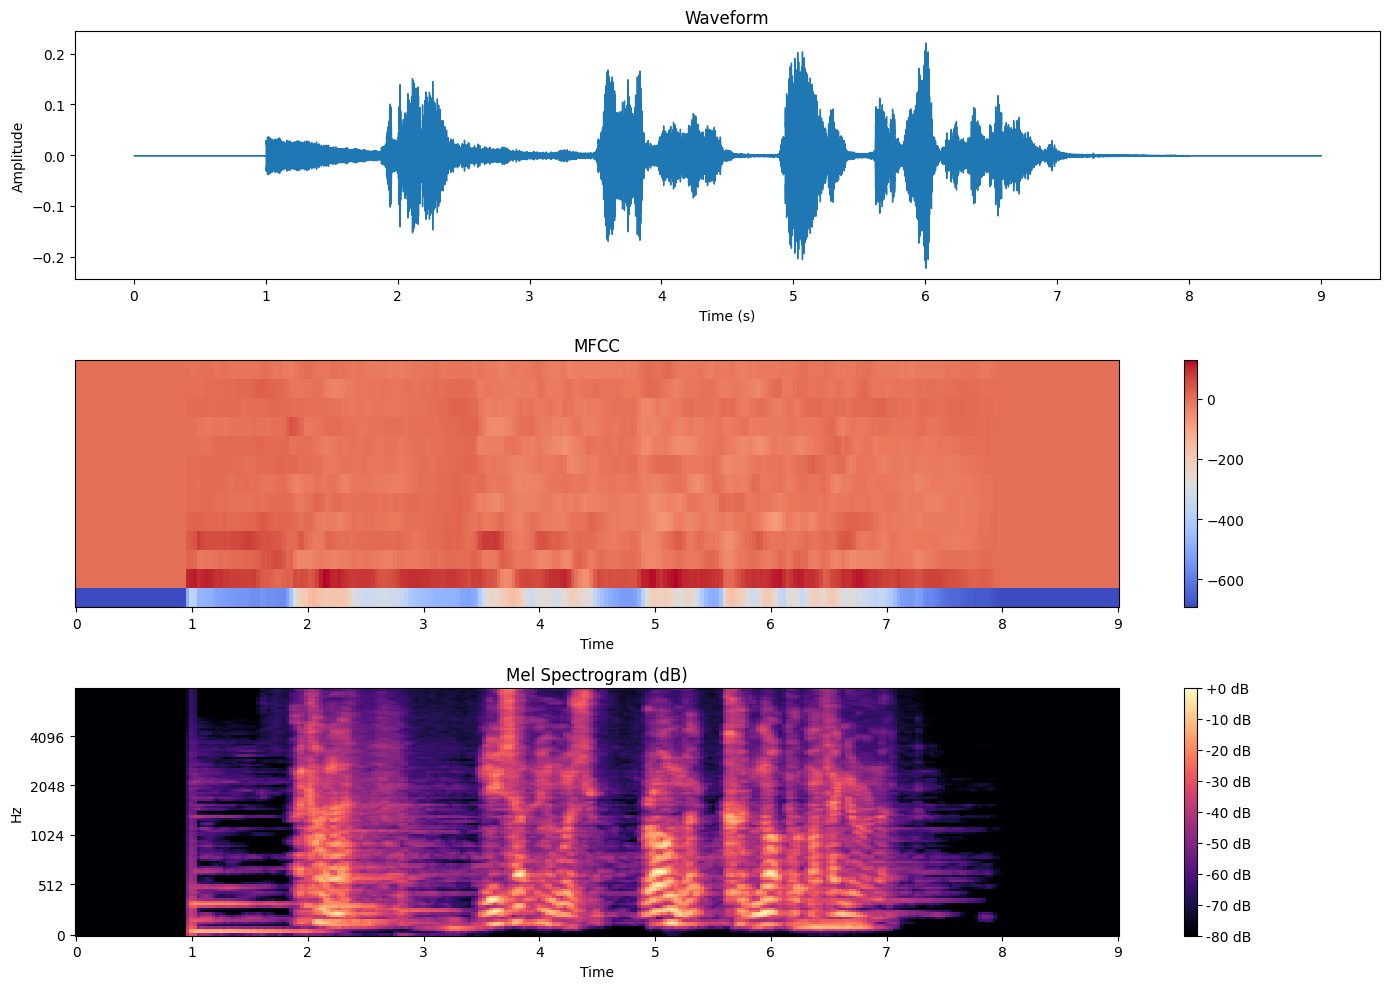

In [25]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your .wav file
file_path = '/kaggle/input/parkinson-master/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/DL/DL1.wav'  # e.g., 'healthy_01.wav' or 'parkinson_01.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Compute features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(14, 10))

# 1. Waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 2. MFCC
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')

# 3. Mel Spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')

plt.tight_layout()
plt.show()


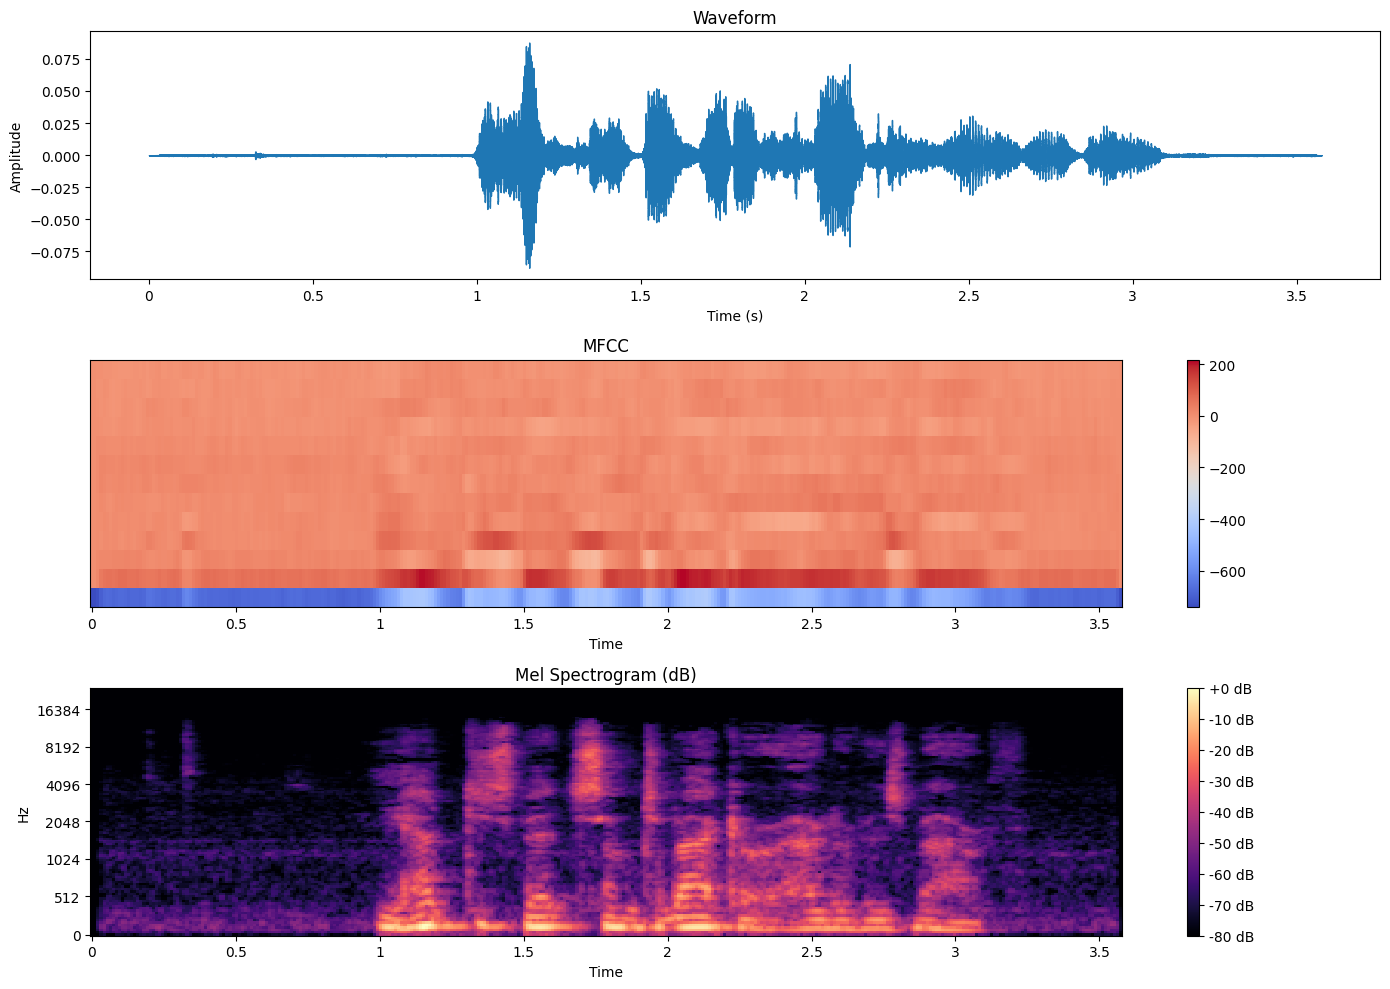

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your .wav file
file_path = '/kaggle/input/common-voice/cv-other-train/cv-other-train/sample-000000.mp3'  # e.g., 'healthy_01.wav' or 'parkinson_01.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Compute features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(14, 10))

# 1. Waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 2. MFCC
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')

# 3. Mel Spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')

plt.tight_layout()
plt.show()


In [27]:
import os
import librosa
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Parameters
SR = 16000
N_MFCC = 50

def extract_audio_features(wav_path):
    y, sr = librosa.load(wav_path, sr=SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)  # shape: (N_MFCC,)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Collect data with person information
data = []
person_data = {}  # Dictionary to store data per person
root_dir = '/kaggle/input/parkinson-master/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset'

print("Loading Parkinson's data...")
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    print(f"Processing folder: {folder}")
    if not os.path.isdir(folder_path):
        continue
    
    # Initialize person data if not exists
    if folder not in person_data:
        person_data[folder] = []
    
    # Recursively walk through folder_path and its subfolders
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):
                wav_path = os.path.join(subdir, file)
                txt_path = os.path.splitext(wav_path)[0] + '.txt'
                if os.path.exists(txt_path):
                    try:
                        # Audio features
                        audio_feat = extract_audio_features(wav_path)
                       
                        # Text features
                        with open(txt_path, 'r', encoding='utf-8') as f:
                            raw_text = f.read()
                        clean_text = preprocess_text(raw_text)
                
                        # Store with person information (0 = Parkinson's)
                        sample = (audio_feat, clean_text, 0, folder)
                        data.append(sample)
                        person_data[folder].append(sample)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
                        continue

print(f"Total Parkinson's samples: {len(data)}")
print(f"Number of Parkinson's people: {len(person_data)}")

# Create separate lists for features and labels
audio_features = [item[0] for item in data]
texts = [item[1] for item in data]
y_0 = [item[2] for item in data]
person_ids = [item[3] for item in data]

# Vectorize text for Parkinson's data
vectorizer = TfidfVectorizer(max_features=100)
X_text_0 = vectorizer.fit_transform(texts).toarray()

# Stack audio and text features
X_audio_0 = np.stack(audio_features)
X_0 = np.concatenate([X_audio_0, X_text_0], axis=1)

print("Parkinson's feature shape:", X_0.shape)
print("Person distribution:")
for person, samples in person_data.items():
    print(f"Person {person}: {len(samples)} samples") 

Loading Parkinson's data...
Processing folder: emma
Processing folder: Faces
Processing folder: Tessi
Processing folder: DL
Processing folder: LW
Total Parkinson's samples: 578
Number of Parkinson's people: 5
Parkinson's feature shape: (578, 150)
Person distribution:
Person emma: 361 samples
Person Faces: 113 samples
Person Tessi: 36 samples
Person DL: 48 samples
Person LW: 20 samples


In [28]:
import os
import pandas as pd

# Load healthy data (Common Voice dataset)
audio_folder = '/kaggle/input/common-voice/cv-other-train/cv-other-train'
csv_path = '/kaggle/input/common-voice/cv-other-train.csv'
N = X_0.shape[0]  # Match the number of Parkinson's samples

def extract_audio_features_healthy(file_path):
    y, sr = librosa.load(file_path, sr=SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)

print("Loading healthy data...")
df = pd.read_csv(csv_path)
print("CSV loaded:", df.shape)

audio_features_healthy = []
texts_healthy = []
person_ids_healthy = []
used = 0

for idx, row in df.iterrows():
    if used >= N:
        break
        
    rel_path = row['filename']
    text = row['text']
    audio_path = os.path.join(audio_folder, os.path.basename(rel_path))
    
    if os.path.exists(audio_path):
        try:
            audio_feat = extract_audio_features_healthy(audio_path)
            text_clean = preprocess_text(text)
            
            audio_features_healthy.append(audio_feat)
            texts_healthy.append(text_clean)
            
            # Create unique person ID for each healthy sample
            person_id = f"healthy_{os.path.basename(rel_path).split('.')[0]}"
            person_ids_healthy.append(person_id)
            used += 1
        except Exception as e:
            print(f"Error processing {audio_path}: {e}")
            continue

print(f"Total healthy samples: {len(audio_features_healthy)}")

# Vectorize text for healthy data using the same vectorizer
X_text_1 = vectorizer.transform(texts_healthy).toarray()

# Stack audio and text features
X_audio_1 = np.stack(audio_features_healthy)
X_1 = np.concatenate([X_audio_1, X_text_1], axis=1)
y_1 = np.ones(X_1.shape[0])  # 1 = Healthy

print("Healthy feature shape:", X_1.shape)

Loading healthy data...
CSV loaded: (145135, 8)
Total healthy samples: 578
Healthy feature shape: (578, 150)


In [29]:
# Load healthy data (Common Voice dataset)
audio_folder = '/kaggle/input/common-voice/cv-other-train/cv-other-train'
csv_path = '/kaggle/input/common-voice/cv-other-train.csv'
N = X_0.shape[0]  # Match the number of Parkinson's samples

def extract_audio_features_healthy(file_path):
    y, sr = librosa.load(file_path, sr=SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)

print("Loading healthy data...")
df = pd.read_csv(csv_path)
print("CSV loaded:", df.shape)

audio_features_healthy = []
texts_healthy = []
person_ids_healthy = []
used = 0

for idx, row in df.iterrows():
    if used >= N:
        break
        
    rel_path = row['filename']
    text = row['text']
    audio_path = os.path.join(audio_folder, os.path.basename(rel_path))
    
    if os.path.exists(audio_path):
        try:
            audio_feat = extract_audio_features_healthy(audio_path)
            text_clean = preprocess_text(text)
            
            audio_features_healthy.append(audio_feat)
            texts_healthy.append(text_clean)
            
            # Create unique person ID for each healthy sample
            person_id = f"healthy_{os.path.basename(rel_path).split('.')[0]}"
            person_ids_healthy.append(person_id)
            used += 1
        except Exception as e:
            print(f"Error processing {audio_path}: {e}")
            continue

print(f"Total healthy samples: {len(audio_features_healthy)}")

# Vectorize text for healthy data using the same vectorizer
X_text_1 = vectorizer.transform(texts_healthy).toarray()

# Stack audio and text features
X_audio_1 = np.stack(audio_features_healthy)
X_1 = np.concatenate([X_audio_1, X_text_1], axis=1)
y_1 = np.ones(X_1.shape[0])  # 1 = Healthy

print("Healthy feature shape:", X_1.shape)

Loading healthy data...
CSV loaded: (145135, 8)
Total healthy samples: 578
Healthy feature shape: (578, 150)


In [30]:
# Combine both datasets
Input = np.concatenate([X_0, X_1])
Output = np.concatenate([y_0, y_1])
All_person_ids = person_ids + person_ids_healthy

print("Combined dataset:")
print(f"Input shape: {Input.shape}")
print(f"Output shape: {Output.shape}")

# Create person-to-indices mapping
person_to_indices = {}
for idx, person_id in enumerate(All_person_ids):
    if person_id not in person_to_indices:
        person_to_indices[person_id] = []
    person_to_indices[person_id].append(idx)

Combined dataset:
Input shape: (1156, 150)
Output shape: (1156,)


In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

# Person-based splitting with specific assignment
print("Performing person-based data splitting...")


# Get unique people and their labels
unique_people = list(set(All_person_ids))
people_labels = []
for person_id in unique_people:
    # Get the first sample's label for this person (all samples from same person have same label)
    first_idx = person_to_indices[person_id][0]
    people_labels.append(Output[first_idx])

people_labels = np.array(people_labels)

# Get all Parkinson's people (label == 0) and healthy people (label == 1)
parkinson_people = [person_id for person_id in unique_people if Output[person_to_indices[person_id][0]] == 0]
healthy_people = [person_id for person_id in unique_people if Output[person_to_indices[person_id][0]] == 1]


# Assign specific Parkinson's person to validation
if len(parkinson_people) >= 3:  # Make sure we have enough people
    parkinson_valid = parkinson_people[2]  # Index 2 for validation
    parkinson_train_test = [p for p in parkinson_people if p != parkinson_valid]
    
   
else:
    print("Error: Not enough Parkinson's people for specific assignment")
    # Fallback to original logic
    parkinson_valid = parkinson_people[0] if len(parkinson_people) > 0 else None
    parkinson_train_test = [p for p in parkinson_people if p != parkinson_valid]

# Split remaining Parkinson's people into train and test
if len(parkinson_train_test) > 1:
    parkinson_train, parkinson_test = train_test_split(
        parkinson_train_test, test_size=0.25, random_state=42  # 25% for test
    )
else:
    parkinson_train = parkinson_train_test
    parkinson_test = []

# For healthy people, split into train/validation/test
healthy_trainval, healthy_test = train_test_split(
    healthy_people, test_size=0.2, random_state=42  # 20% for test
)

if len(healthy_trainval) > 1:
    healthy_train, healthy_valid = train_test_split(
        healthy_trainval, test_size=0.2, random_state=42  # 20% of remaining for validation
    )
else:
    healthy_train = healthy_trainval
    healthy_valid = []

# Convert single items to lists if needed
if isinstance(parkinson_test, str):
    parkinson_test = [parkinson_test]
if isinstance(healthy_test, str):
    healthy_test = [healthy_test]
if isinstance(healthy_valid, str):
    healthy_valid = [healthy_valid]

# Combine assignments
people_train = parkinson_train + healthy_train
people_valid = [parkinson_valid] + healthy_valid
people_test = parkinson_test + healthy_test

# Remove None values
people_train = [p for p in people_train if p is not None]
people_valid = [p for p in people_valid if p is not None]
people_test = [p for p in people_test if p is not None]



# Count labels for each split
train_parkinson = sum(1 for p in people_train if Output[person_to_indices[p][0]] == 0)
train_healthy = sum(1 for p in people_train if Output[person_to_indices[p][0]] == 1)
valid_parkinson = sum(1 for p in people_valid if Output[person_to_indices[p][0]] == 0)
valid_healthy = sum(1 for p in people_valid if Output[person_to_indices[p][0]] == 1)
test_parkinson = sum(1 for p in people_test if Output[person_to_indices[p][0]] == 0)
test_healthy = sum(1 for p in people_test if Output[person_to_indices[p][0]] == 1)

print(f"\nSplit results:")
print(f"Train people: {len(people_train)} (Parkinson: {train_parkinson}, Healthy: {train_healthy})")
print(f"Valid people: {len(people_valid)} (Parkinson: {valid_parkinson}, Healthy: {valid_healthy})")
print(f"Test people: {len(people_test)} (Parkinson: {test_parkinson}, Healthy: {test_healthy})")

# Create sample indices for each split
train_indices = []
valid_indices = []
test_indices = []

for person_id in people_train:
    train_indices.extend(person_to_indices[person_id])

for person_id in people_valid:
    valid_indices.extend(person_to_indices[person_id])

for person_id in people_test:
    test_indices.extend(person_to_indices[person_id])

# Convert to numpy arrays and sort for consistent ordering
train_indices = np.sort(np.array(train_indices))
valid_indices = np.sort(np.array(valid_indices))
test_indices = np.sort(np.array(test_indices))

# Create the actual splits
X_train = Input[train_indices]
y_train = Output[train_indices]
X_valid = Input[valid_indices]
y_valid = Output[valid_indices]
X_test = Input[test_indices]
y_test = Output[test_indices]

print(f"\nFinal sample splits:")
print(f"Train: {X_train.shape[0]} samples ({X_train.shape[0]/Input.shape[0]*100:.1f}%)")
print(f"Valid: {X_valid.shape[0]} samples ({X_valid.shape[0]/Input.shape[0]*100:.1f}%)")
print(f"Test: {X_test.shape[0]} samples ({X_test.shape[0]/Input.shape[0]*100:.1f}%)")

# DATA NORMALIZATION

# Normalize audio features (first 50 columns) using training data statistics
min_x_audio = np.min(X_train[:,:50])
max_x_audio = np.max(X_train[:,:50])

print(f"\nAudio features normalization parameters:")
print(f"Min value: {min_x_audio:.4f}")
print(f"Max value: {max_x_audio:.4f}")

# Apply min-max normalization to audio features for all splits
X_train[:,:50] = (X_train[:,:50] - min_x_audio) / (max_x_audio - min_x_audio)
X_valid[:,:50] = (X_valid[:,:50] - min_x_audio) / (max_x_audio - min_x_audio)
X_test[:,:50] = (X_test[:,:50] - min_x_audio) / (max_x_audio - min_x_audio)

print(f"\nNormalized data ranges:")
print(f"Train audio features: [{np.min(X_train[:,:50]):.4f}, {np.max(X_train[:,:50]):.4f}]")
print(f"Valid audio features: [{np.min(X_valid[:,:50]):.4f}, {np.max(X_valid[:,:50]):.4f}]")
print(f"Test audio features: [{np.min(X_test[:,:50]):.4f}, {np.max(X_test[:,:50]):.4f}]")




Performing person-based data splitting...

Split results:
Train people: 372 (Parkinson: 3, Healthy: 369)
Valid people: 94 (Parkinson: 1, Healthy: 93)
Test people: 117 (Parkinson: 1, Healthy: 116)

Final sample splits:
Train: 473 samples (40.9%)
Valid: 454 samples (39.3%)
Test: 229 samples (19.8%)

Audio features normalization parameters:
Min value: -1131.3710
Max value: 151.8422

Normalized data ranges:
Train audio features: [0.0000, 1.0000]
Valid audio features: [0.0000, 0.9946]
Test audio features: [0.0000, 1.0088]


In [32]:
# import os

# def check_file_types(root_dir):
#     extensions = set()
#     for subdir, _, files in os.walk(root_dir):
#         for file in files:
#             ext = os.path.splitext(file)[1].lower()
#             extensions.add(ext)
#     return extensions

# root_directory = '/kaggle/input/common-voice/cv-invalid/cv-invalid'  # Change to your folder path if needed
# file_types = check_file_types(root_directory)
# print("File types found:", file_types)

In [33]:
# from sklearn.model_selection import train_test_split

# # First split into train+valid and test
# X_trainval, X_test, y_trainval, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # Then split train+valid into train and valid
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval
# )

# print("Train:", X_train.shape, y_train.shape)
# print("Valid:", X_valid.shape, y_valid.shape)
# print("Test:", X_test.shape, y_test.shape)

In [34]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [35]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = ['parkinson', 'no parkinson']
def plot_confusion_matrix(true_label, predict_label, pl = True):
    true_label = true_label.reshape(true_label.shape[0], 1)
    predict_label = predict_label.reshape(predict_label.shape[0], 1)

    cm = confusion_matrix(y_true = true_label, y_pred = predict_label)
    print(cm)
    cm_per = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100,2)

    if pl == True:
        df_cm = pd.DataFrame(cm_per, index = classes, columns = classes)
        plt.figure(figsize = (7, 6))
        sns.heatmap(df_cm, annot=True, cmap = "Blues",vmax=100, linewidths=.1 ,fmt='.2f')
        plt.title("Confusion matrix")
        plt.xlabel('Predict', fontsize=12)
        plt.ylabel('True', fontsize=12)
        plt.tight_layout()

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as XGBClassifier
import joblib  # For saving models
import os
from xgboost import XGBClassifier

# Tạo thư mục lưu model
os.makedirs("saved_models", exist_ok=True)

# Khởi tạo mô hình
models = {
    'Logistic Regression': [
        LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000),
        LogisticRegression(C=0.1,  penalty='l2', solver='liblinear', max_iter=1000),
        LogisticRegression(C=1.0,  penalty='l2', solver='lbfgs',    max_iter=1000),
        LogisticRegression(C=10.0, penalty='l1', solver='saga',      max_iter=1000),
        LogisticRegression(C=100.0, penalty='l2', solver='lbfgs',    max_iter=1000),
    ],

    'SVM': [
        SVC(C=0.1,  kernel='linear', degree=3, gamma='scale'),
        SVC(C=1.0,  kernel='linear', degree=3, gamma='scale'),
        SVC(C=1.0,  kernel='rbf',    degree=3, gamma='scale'),
        SVC(C=10.0, kernel='rbf',    degree=3, gamma='auto'),
        SVC(C=1.0,  kernel='poly',   degree=2, gamma='scale'),
    ],

    'Random Forest': [
        RandomForestClassifier(n_estimators=50,  max_depth=5,   min_samples_split=2),
        RandomForestClassifier(n_estimators=100, max_depth=10,  min_samples_split=2),
        RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2),
        RandomForestClassifier(n_estimators=100, max_depth=5,   min_samples_split=5),
        RandomForestClassifier(n_estimators=150, max_depth=15,  min_samples_split=2),
    ],

    'KNN': [
        KNeighborsClassifier(n_neighbors=1, weights='uniform'),
        KNeighborsClassifier(n_neighbors=3, weights='uniform'),
        KNeighborsClassifier(n_neighbors=5, weights='uniform'),
        KNeighborsClassifier(n_neighbors=5, weights='distance'),
        KNeighborsClassifier(n_neighbors=7, weights='distance'),
    ],
    'XGBoost': [
        XGBClassifier(n_estimators=50,  max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
        XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
        XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss'),
        XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, use_label_encoder=False, eval_metric='logloss'),
        XGBClassifier(n_estimators=150, max_depth=4, learning_rate=0.2, use_label_encoder=False, eval_metric='logloss'),
    ]
}

results = []

# Tạo thư mục nếu chưa có
os.makedirs("saved_models", exist_ok=True)

for model_name, model_list in models.items():
    for i, model in enumerate(model_list):
        # Tên mô hình mở rộng để phân biệt
        name = f"{model_name}_{i+1}"

        # Huấn luyện
        model.fit(X_train, y_train)

        # Dự đoán
        y_pred_val = model.predict(X_valid)
        y_pred_test = model.predict(X_test)

        # Tính độ chính xác
        val_acc = accuracy_score(y_valid, y_pred_val)
        test_acc = accuracy_score(y_test, y_pred_test)

        print(f"\n📌 {name}")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print("Classification Report (Test):")
        print(classification_report(y_test, y_pred_test, zero_division=0))

        # Lưu kết quả vào danh sách
        results.append({
            "Model": name,
            "Params": model.get_params(),
            "Val_Accuracy": val_acc,
            "Test_Accuracy": test_acc,
            "Precision": precision_score(y_test, y_pred_test, average='macro', zero_division=0),
            "Recall": recall_score(y_test, y_pred_test, average='macro', zero_division=0),
            "F1": f1_score(y_test, y_pred_test, average='macro', zero_division=0),
        })

        # Lưu mô hình
        model_path = f"saved_models/{name.replace(' ', '_')}.joblib"
        joblib.dump(model, model_path)
        print(f"✅ Model saved to: {model_path}")

# Chuyển kết quả thành DataFrame
import pandas as pd
results_df = pd.DataFrame(results)





📌 Logistic Regression_1
Validation Accuracy: 0.2048
Test Accuracy: 0.5066
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       113
         1.0       0.51      1.00      0.67       116

    accuracy                           0.51       229
   macro avg       0.25      0.50      0.34       229
weighted avg       0.26      0.51      0.34       229

✅ Model saved to: saved_models/Logistic_Regression_1.joblib

📌 Logistic Regression_2
Validation Accuracy: 0.2048
Test Accuracy: 0.5066
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       113
         1.0       0.51      1.00      0.67       116

    accuracy                           0.51       229
   macro avg       0.25      0.50      0.34       229
weighted avg       0.26      0.51      0.34       229

✅ Model saved to: saved_models/Logistic_Regression_2.joblib

📌 Logistic Regr

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



📌 Logistic Regression_4
Validation Accuracy: 0.6454
Test Accuracy: 0.6769
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.84      0.42      0.56       113
         1.0       0.62      0.92      0.74       116

    accuracy                           0.68       229
   macro avg       0.73      0.67      0.65       229
weighted avg       0.73      0.68      0.66       229

✅ Model saved to: saved_models/Logistic_Regression_4.joblib

📌 Logistic Regression_5
Validation Accuracy: 0.6564
Test Accuracy: 0.6943
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.85      0.46      0.60       113
         1.0       0.64      0.92      0.75       116

    accuracy                           0.69       229
   macro avg       0.74      0.69      0.68       229
weighted avg       0.74      0.69      0.68       229

✅ Model saved to: saved_models/Logistic_Regression_5.joblib

📌 SVM_1
Validat

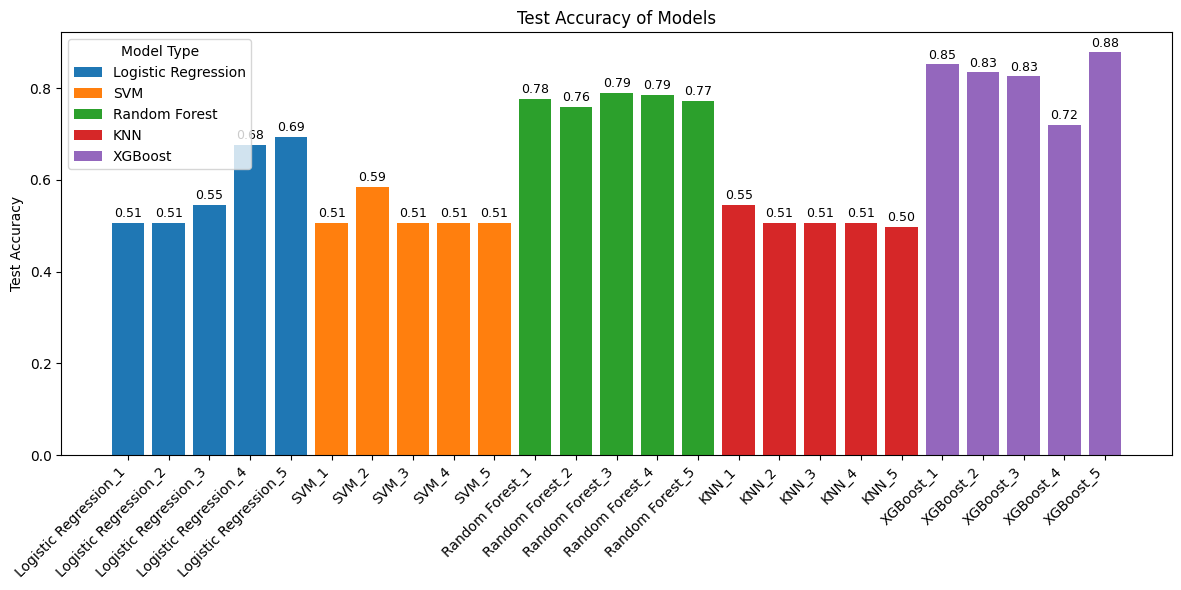

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Chuyển kết quả thành DataFrame nếu chưa có
results_df = pd.DataFrame(results)

# Trích loại model chính từ tên (VD: Logistic_Regression_1 → Logistic)
results_df['ModelType'] = results_df['Model'].apply(lambda x: x.split('_')[0])

# Viết tắt tên model
model_name_map = {
    'Logistic': 'LR',
    'Random': 'RF',
    'SVM': 'SVM',
    'KNN': 'KNN'
}

# Tạo cột tên rút gọn để hiển thị
results_df['ShortModelName'] = results_df.apply(
    lambda row: f"{model_name_map.get(row['ModelType'], row['ModelType'])}_{row['Model'].split('_')[-1]}",
    axis=1
)

# Lấy danh sách loại model
model_types = results_df['ModelType'].unique()
color_map = {model: color for model, color in zip(model_types, plt.cm.tab10.colors)}

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
colors = [color_map[model_type] for model_type in results_df['ModelType']]
bars = plt.bar(x, results_df['Test_Accuracy'], color=colors)

# Gắn nhãn trên cột
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

# Gán trục x là tên viết tắt
plt.xticks(x, results_df['ShortModelName'], rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Models')
plt.tight_layout()

# Chú thích màu
legend_elements = [Patch(facecolor=color_map[model], label=model_name_map.get(model, model))
                   for model in model_types]
plt.legend(handles=legend_elements, title='Model Type')
plt.show()


In [61]:
import pandas as pd

# Giả sử bạn đã có DataFrame `results_df` như ở trên
# Rút gọn model name nếu chưa có
results_df['ModelType'] = results_df['Model'].apply(lambda x: x.split('_')[0])
model_name_map = {
    'Logistic': 'LR',
    'Random': 'RF',
    'SVM': 'SVM',
    'KNN': 'KNN'
}
results_df['ShortModelName'] = results_df.apply(
    lambda row: f"{model_name_map.get(row['ModelType'], row['ModelType'])}_{row['Model'].split('_')[-1]}",
    axis=1
)
results_df['ModelOrder'] = results_df['Model'].apply(lambda x: int(x.split('_')[-1]))

# Format Params
def format_params(param_dict):
    keys_to_show = ['C', 'kernel', 'n_estimators', 'max_depth', 'n_neighbors', 'weights', 'penalty']
    return ', '.join([f"{k}={v}" for k, v in param_dict.items() if k in keys_to_show])
results_df['ParamsStr'] = results_df['Params'].apply(format_params)

# Sắp xếp theo nhóm model và thứ tự
results_df = results_df.sort_values(by=['ModelType', 'ModelOrder'])

# Tạo bảng kết quả
table_df = results_df[['ShortModelName', 'ParamsStr', 'Test_Accuracy', 'Precision', 'Recall', 'F1']].copy()
table_df[['Test_Accuracy', 'Precision', 'Recall', 'F1']] = table_df[
    ['Test_Accuracy', 'Precision', 'Recall', 'F1']].round(4)

# Ghi ra file Excel
output_path = "model_test_results.xlsx"
table_df.to_excel(output_path, index=False)
print(f"✅ Đã lưu file Excel tại: {output_path}")


✅ Đã lưu file Excel tại: model_test_results.xlsx



🔍 ROC Curve: Logistic Regression


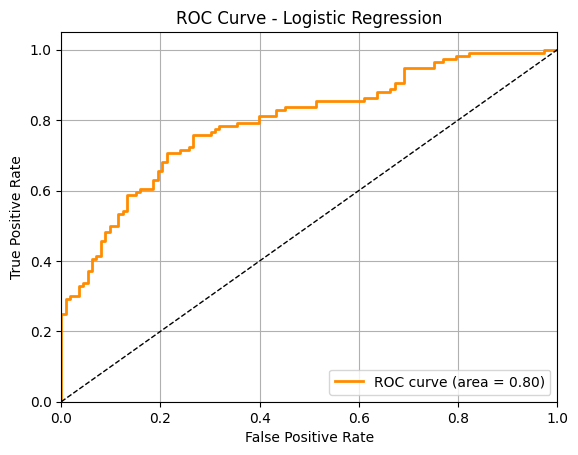


🔍 ROC Curve: SVM


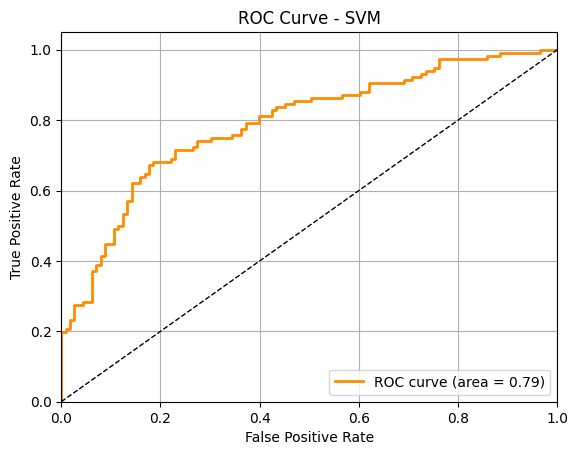


🔍 ROC Curve: Random Forest


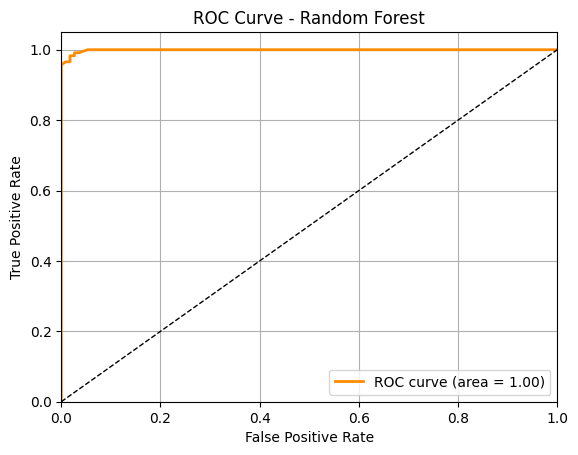


🔍 ROC Curve: KNN


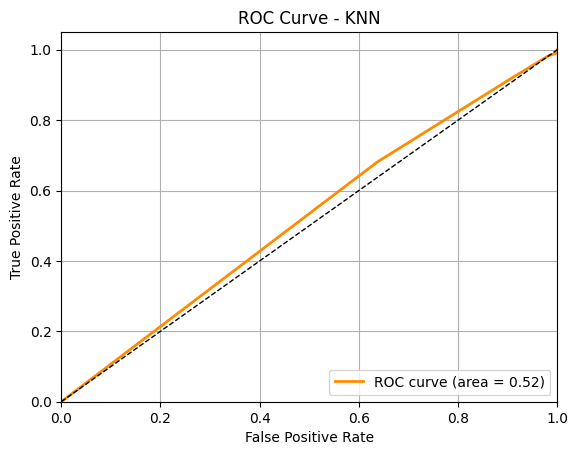


🔍 ROC Curve: XGBoost


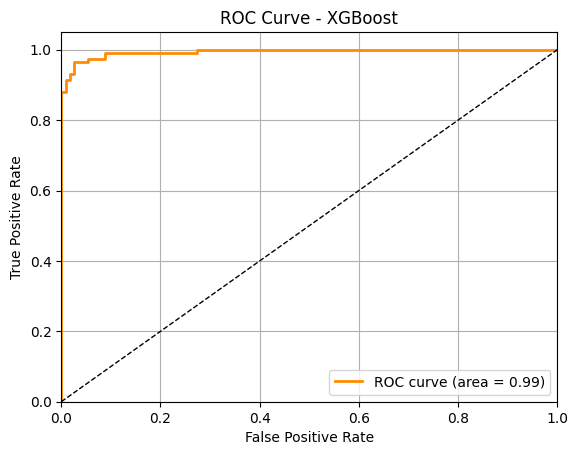

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Số lớp
n_classes = len(np.unique(y_train))

# Nếu là nhị phân thì giữ nguyên, nếu đa lớp thì cần one-hot encode nhãn
if n_classes > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
else:
    y_test_bin = y_test

# Vẽ ROC Curve cho từng mô hình
for name, model in models.items():
    print(f"\n🔍 ROC Curve: {name}")

    # Predict probabilities
    try:
        y_score = model.predict_proba(X_test)
    except:
        print(f"⚠️ Model {name} does not support predict_proba()")
        continue

    plt.figure()
    if n_classes == 2:
        # Nhị phân
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    else:
        # Đa lớp
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [38]:
model1 = joblib.load('/kaggle/working/saved_models/KNN.joblib')

In [39]:
# Use a file NOT in your training/validation/test set
audio_path = '/kaggle/input/common-voice/cv-other-test/cv-other-test/sample-000012.mp3'
X_audio_1=extract_audio_features(audio_path).reshape(1,50)
# X_audio_1 = np.stack(x_rt)
print(X_audio_1.shape)
X_audio_1 = (X_audio_1-min_x)/(max_x-min_x)
print(X_audio_1.shape)
print(np.min(X_audio_1),np.max(X_audio_1))
pred = model1.predict(X_audio_1)
print(pred)
# pred_class = np.argmax(pred_probs, axis=1)[0]
# print(pred_class)
LABELS=["parkinson","no parkinson"]
print("Predicted label:", LABELS[int(pred)])

(1, 50)


NameError: name 'min_x' is not defined